### Loading in the Data

In [128]:
#import the relevant libraries
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
import math
from random import sample
from scipy.stats import pearsonr

#reading in the data
life = pd.read_csv("all_data.csv")
life.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Exploring the Data

In [61]:
#Finding unique country values
print(life.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [62]:
#Finding Unique Years that data was collected
print(life.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [23]:
#Basic descriptive stats for each quantitative variable
print(life.describe())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


Notice that the dataset only contains data from the years 2000 to 2015 and takes in data from adults that are 44.3 to 81 years old. Therefore, no children are included in this dataset.

### Renaming Unnecessary Column Names

In [129]:
life = life.rename({'Life expectancy at birth (years)': 'life_expectancy'}, axis = 'columns')
life.head()

,Country,Year,life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Exploratory Plots

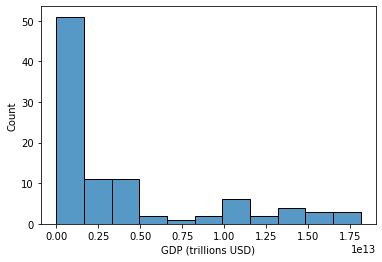

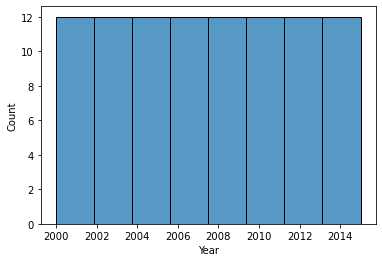

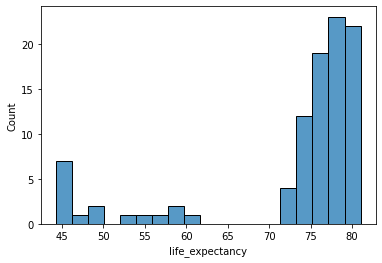

<Figure size 432x288 with 0 Axes>

In [130]:
#Taking a look at the distributions for the quantitative variables
sns.histplot(data=life.GDP)
plt.xlabel('GDP (trillions USD)')
plt.show()
plt.clf()
#This plot is heavily left-skewed with a long right-hand tail

sns.histplot(data=life.Year)
plt.show()
plt.clf()
#This shows that each year has an even distribution/ the same amount of data was collected for each year

sns.histplot(data=life.life_expectancy)
plt.show()
plt.clf()
#shows a right-skewed distribution with a slight left-hand tail

### Exploring Quantitative Variables for Each Country

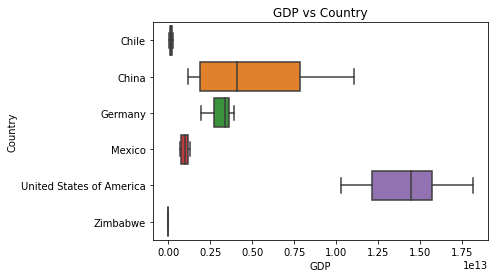

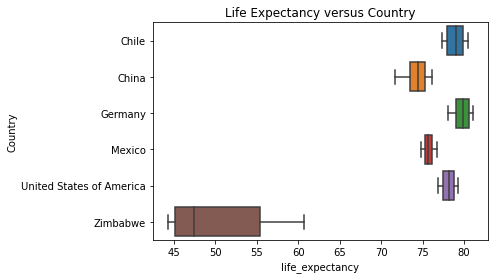

<Figure size 432x288 with 0 Axes>

In [131]:
#Let's explore country against each quantitative variable using boxplots
sns.boxplot(x=life.GDP, y=life.Country)
plt.title('GDP vs Country')
plt.show()
plt.clf()

sns.boxplot(x=life.life_expectancy, y=life.Country)
plt.title('Life Expectancy versus Country')
plt.show()
plt.clf()

### Finding Average Life Expectancy and GDP for each country

In [132]:
life_averages = life.groupby("Country").mean().reset_index()
life_averages = life_averages.drop("Year", axis = 1)
life_averages

,Country,life_expectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Now let's plot these averages in bar charts

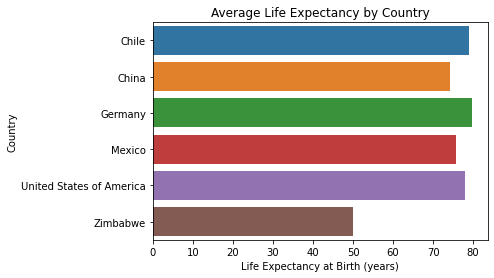

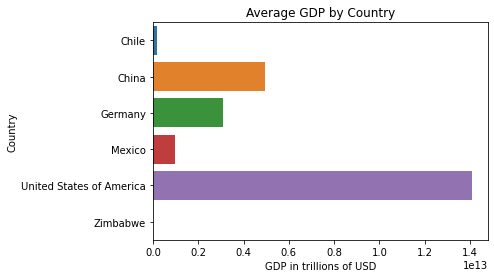

<Figure size 432x288 with 0 Axes>

In [133]:
sns.barplot(x='life_expectancy', y='Country', data=life_averages)
plt.title('Average Life Expectancy by Country')
plt.xlabel('Life Expectancy at Birth (years)')
plt.show()
plt.clf()

sns.barplot(x='GDP', y='Country', data=life_averages)
plt.title('Average GDP by Country')
plt.xlabel('GDP in trillions of USD')
plt.show()
plt.clf()

### Comparing Life Expectancy Over Time for All Countries

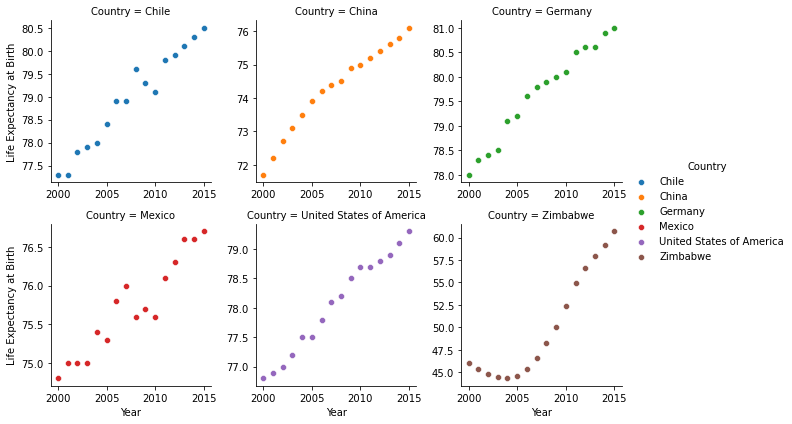

In [134]:
graphLE = sns.FacetGrid(life, col="Country", hue='Country', col_wrap=3, sharex=False, sharey=False)
graphLE.map(sns.scatterplot, "Year", "life_expectancy").add_legend()
graphLE.set_axis_labels('Year', 'Life Expectancy at Birth')


### Comparing GDP Over Time for Each Country

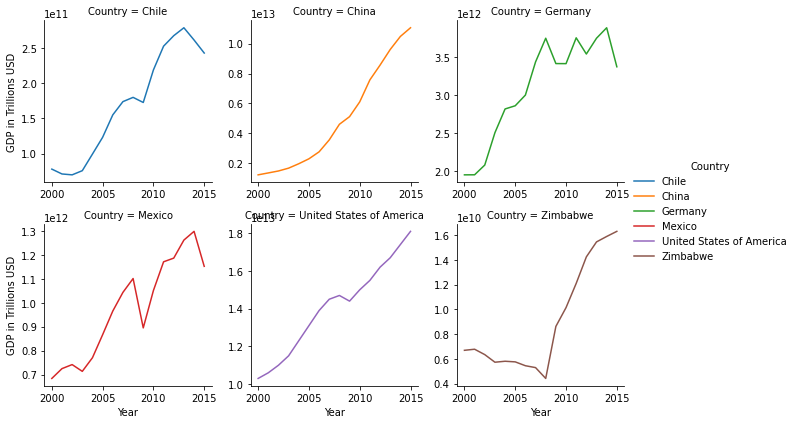

In [135]:
graphGDP = sns.FacetGrid(life, col="Country", hue="Country", col_wrap=3, sharex=False, sharey=False)
graphGDP.map(sns.lineplot, "Year", "GDP")
graphGDP.add_legend()
graphGDP.set_axis_labels('Year', 'GDP in Trillions USD')

### Exploring Life Expectancy vs GDP for Each Country

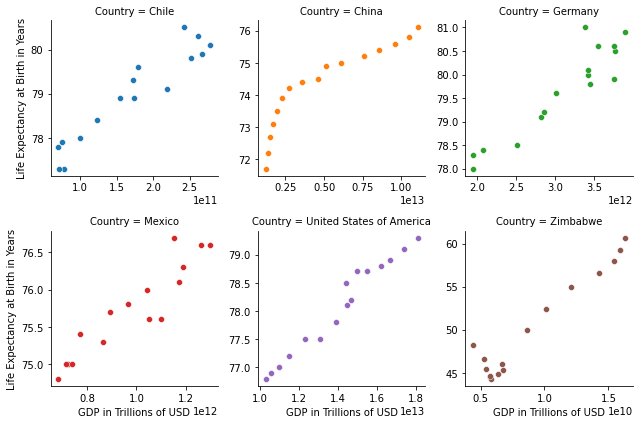

In [136]:
LE_vs_GDP = sns.FacetGrid(life, col='Country', col_wrap=3, hue='Country', sharex=False, sharey=False)
LE_vs_GDP.map(sns.scatterplot, 'GDP', 'life_expectancy')
LE_vs_GDP.set_axis_labels('GDP in Trillions of USD', 'Life Expectancy at Birth in Years')

From the above graphs, it can be seen that as GDP increases, life expectancy will also increase (on average). These two can be said to be positively correlated. 

### Exploring Covariance and Correlation

In [137]:
#Creating a covariance matrix for life expectancy and GDP
cov_le_gdp = np.cov(life.life_expectancy, life.GDP)
print('The covariance between life expectancy and GDP is ' + str(cov_le_gdp[0][1]))

The covariance between life expectancy and GDP is 19038694275754.94


In [138]:
#Assessing correlation coefficient between the two variables
corr_le_gdp, p = pearsonr(life.life_expectancy, life.GDP)
print(corr_le_gdp)

0.34320674844915605


Since the correlation coefficient between these two variables is above 0.3, it can be said that there is a linear association between the two variables. 